In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
bike_data_raw = pd.read_csv('daily-bike-share.csv')
bike_data_raw

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0          1    1/1/2011       1   0     1        0        6           0   
1          2    1/2/2011       1   0     1        0        0           0   
2          3    1/3/2011       1   0     1        0        1           1   
3          4    1/4/2011       1   0     1        0        2           1   
4          5    1/5/2011       1   0     1        0        3           1   
..       ...         ...     ...  ..   ...      ...      ...         ...   
726      727  12/27/2012       1   1    12        0        4           1   
727      728  12/28/2012       1   1    12        0        5           1   
728      729  12/29/2012       1   1    12        0        6           0   
729      730  12/30/2012       1   1    12        0        0           0   
730      731  12/31/2012       1   1    12        0        1           1   

     weathersit      temp     atemp       hum  windspeed  rentals  
0             2  0.344167  0.363625  0.805833   0.160446      331  
1             2  0.363478  0.353739  0.696087   0.248539      131  
2             1  0.196364  0.189405  0.437273   0.248309      120  
3             1  0.200000  0.212122  0.590435   0.160296      108  
4             1  0.226957  0.229270  0.436957   0.186900       82  
..          ...       ...       ...       ...        ...      ...  
726           2  0.254167  0.226642  0.652917   0.350133      247  
727           2  0.253333  0.255046  0.590000   0.155471      644  
728           2  0.253333  0.242400  0.752917   0.124383      159  
729           1  0.255833  0.231700  0.483333   0.350754      364  
730           2  0.215833  0.223487  0.577500   0.154846      439  

[731 rows x 14 columns]

In [2]:
#Zanim jednak zaczniemy uczyć modele, to zgodnie z CRISP-DM najpierw musimy je zrozumieć, a później będziemy mogli je przetworzyć.

#Skorzystajmy z metody info i sprawdźmy typ zmiennych.

bike_data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  rentals     731 non-null    int64  
dtypes: float64(4), int64(9), object(1)
memory usage: 80.1+ KB


In [3]:
#Cechy są typu całkowitego (int) lub zmiennoprzecinkowego (float), poza zmienną dteday, która jest objectem, czyli stringiem. W Pandas mamy dostępny 
#typ datetime, który przeznaczony jest dla wartości związanych z czasem. Jednak przez to, że data w naszych danych jest oddzielona symbolem /, to
#Pandas nie odczytał jej domyślnie jako datę. Zmieńmy typ danych, wykorzystując funkcję to_datetime z biblioteki Pandas.

bike_data_raw['dteday'] = pd.to_datetime(bike_data_raw['dteday'])
display(bike_data_raw)
print(bike_data_raw.info())

instant     dteday  season  yr  mnth  holiday  weekday  workingday  \
0          1 2011-01-01       1   0     1        0        6           0   
1          2 2011-01-02       1   0     1        0        0           0   
2          3 2011-01-03       1   0     1        0        1           1   
3          4 2011-01-04       1   0     1        0        2           1   
4          5 2011-01-05       1   0     1        0        3           1   
..       ...        ...     ...  ..   ...      ...      ...         ...   
726      727 2012-12-27       1   1    12        0        4           1   
727      728 2012-12-28       1   1    12        0        5           1   
728      729 2012-12-29       1   1    12        0        6           0   
729      730 2012-12-30       1   1    12        0        0           0   
730      731 2012-12-31       1   1    12        0        1           1   

     weathersit      temp     atemp       hum  windspeed  rentals  
0             2  0.344167  0.363625  0.805833   0.160446      331  
1             2  0.363478  0.353739  0.696087   0.248539      131  
2             1  0.196364  0.189405  0.437273   0.248309      120  
3             1  0.200000  0.212122  0.590435   0.160296      108  
4             1  0.226957  0.229270  0.436957   0.186900       82  
..          ...       ...       ...       ...        ...      ...  
726           2  0.254167  0.226642  0.652917   0.350133      247  
727           2  0.253333  0.255046  0.590000   0.155471      644  
728           2  0.253333  0.242400  0.752917   0.124383      159  
729           1  0.255833  0.231700  0.483333   0.350754      364  
730           2  0.215833  0.223487  0.577500   0.154846      439  

[731 rows x 14 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  rentals     731 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(9)
memory usage: 80.1 KB
None


In [4]:
bike_data_raw['rentals'].describe()

count     731.000000
mean      848.176471
std       686.622488
min         2.000000
25%       315.500000
50%       713.000000
75%      1096.000000
max      3410.000000
Name: rentals, dtype: float64

(array([ 96., 108.,  66.,  78.,  95.,  70.,  54.,  35.,  28.,  16.,  12.,
         11.,  10.,  16.,  12.,  10.,   6.,   3.,   2.,   3.]),
 array([2.0000e+00, 1.7240e+02, 3.4280e+02, 5.1320e+02, 6.8360e+02,
        8.5400e+02, 1.0244e+03, 1.1948e+03, 1.3652e+03, 1.5356e+03,
        1.7060e+03, 1.8764e+03, 2.0468e+03, 2.2172e+03, 2.3876e+03,
        2.5580e+03, 2.7284e+03, 2.8988e+03, 3.0692e+03, 3.2396e+03,
        3.4100e+03]),
 <BarContainer object of 20 artists>)

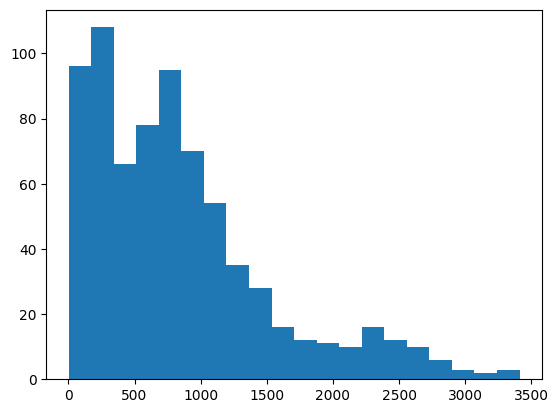

In [5]:
plt.hist(bike_data_raw['rentals'], bins=20)

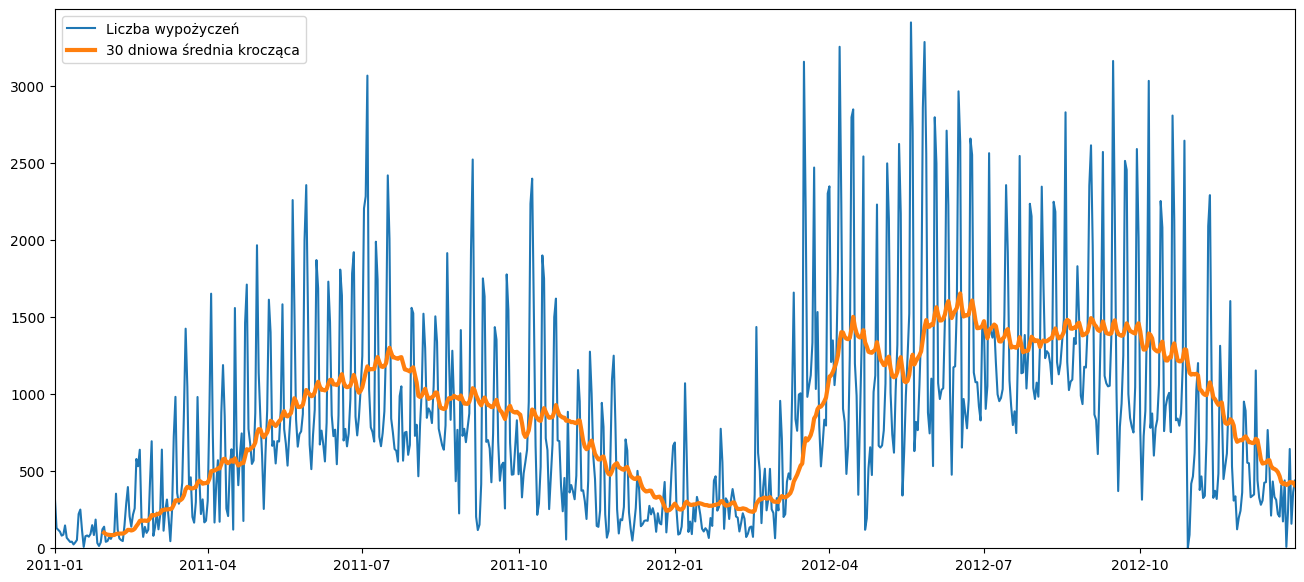

In [6]:
#Nasze dane niewątpliwie są szeregiem czasowym (choć my po feature enginnering podejdziemy do problemu jak do typowego problemu regresji). 
#Najlepiej zobaczyć jak liczba wypożyczeń zmieniała się w czasie. Dodajemy do wykresu również średnią kroczącą z ostatnich 30 dni. Jest to przydatne,
#jeśli pomiędzy poszczególnymi dniami są spore zależności.

plt.figure(figsize=(16, 7))
plt.plot(bike_data_raw['dteday'], bike_data_raw['rentals'], label='Liczba wypożyczeń')
plt.plot(bike_data_raw['dteday'], bike_data_raw['rentals'].rolling(30).mean(), linewidth=3.0, label='30 dniowa średnia krocząca')
plt.xlim([bike_data_raw['dteday'].min(), bike_data_raw['dteday'].max()])
plt.ylim([0, bike_data_raw['rentals'].max()*1.025])
plt.legend(loc='upper left')
plt.show()

In [7]:
#Co możemy wywnioskować, patrząc na ten wykres? Przede wszystkim widać sporą wariancję, jest znaczna różnica pomiędzy najwyższa a najniższą wartością w
#krótkim okresie. Hm… Z czego to może wynikać? Sprawdźmy częstotliwość. Jak to zrobić? Możesz policzyć ilość wzrostów w jednym roku. Zobaczysz, że 
#częstotliwość jest tygodniowa. Z pewnością jeździsz rowerem, z czego to może wynikać? Na przykład z tego, że w weekendy dla relaksu więcej osób 
#wypożycza rower. Jednak my jeszcze tego nie wiemy, dopiero będziemy to sprawdzać. Powód może być zupełnie inny, w dni robocze jest więcej wypożyczeń,
#ponieważ rowery są traktowane jako środek transportu. Niemniej już teraz możemy stwierdzić, że istnieje sezonowość tygodniowa.

#Uff… Całe szczęście, że na wykresie również znalazła się średnia ruchoma ???? Tym zabiegiem zniwelowaliśmy wariancję i możemy sprawdzić jaka jest 
#średnia wypożyczeń w czasie. Można było spodziewać się, że w okresie wakacyjnym zdecydowanie więcej jest wypożyczeń, niż w okresie zimowym.

#Jesteśmy na etapie eksploracji danych, ale już teraz zdecydować możemy o usunięciu niektórych kolumn:

#    instant – unikalny indeks wiersza, ta zmienna nie jest informatywna,
#    dteday – data, informacje z tej cechy są już zawarte w innych cechach,
#    yr – rok 2011 już nie wróci.

print('Przed usunięciem:')
display(bike_data_raw)
print('Po usunięciu:')
bike_data = bike_data_raw.copy()
bike_data.drop(['instant', 'dteday', 'yr'], axis=1, inplace=True)
display(bike_data)

Przed usunięciem:


instant     dteday  season  yr  mnth  holiday  weekday  workingday  \
0          1 2011-01-01       1   0     1        0        6           0   
1          2 2011-01-02       1   0     1        0        0           0   
2          3 2011-01-03       1   0     1        0        1           1   
3          4 2011-01-04       1   0     1        0        2           1   
4          5 2011-01-05       1   0     1        0        3           1   
..       ...        ...     ...  ..   ...      ...      ...         ...   
726      727 2012-12-27       1   1    12        0        4           1   
727      728 2012-12-28       1   1    12        0        5           1   
728      729 2012-12-29       1   1    12        0        6           0   
729      730 2012-12-30       1   1    12        0        0           0   
730      731 2012-12-31       1   1    12        0        1           1   

     weathersit      temp     atemp       hum  windspeed  rentals  
0             2  0.344167  0.363625  0.805833   0.160446      331  
1             2  0.363478  0.353739  0.696087   0.248539      131  
2             1  0.196364  0.189405  0.437273   0.248309      120  
3             1  0.200000  0.212122  0.590435   0.160296      108  
4             1  0.226957  0.229270  0.436957   0.186900       82  
..          ...       ...       ...       ...        ...      ...  
726           2  0.254167  0.226642  0.652917   0.350133      247  
727           2  0.253333  0.255046  0.590000   0.155471      644  
728           2  0.253333  0.242400  0.752917   0.124383      159  
729           1  0.255833  0.231700  0.483333   0.350754      364  
730           2  0.215833  0.223487  0.577500   0.154846      439  

[731 rows x 14 columns]

Po usunięciu:


season  mnth  holiday  weekday  workingday  weathersit      temp  \
0         1     1        0        6           0           2  0.344167   
1         1     1        0        0           0           2  0.363478   
2         1     1        0        1           1           1  0.196364   
3         1     1        0        2           1           1  0.200000   
4         1     1        0        3           1           1  0.226957   
..      ...   ...      ...      ...         ...         ...       ...   
726       1    12        0        4           1           2  0.254167   
727       1    12        0        5           1           2  0.253333   
728       1    12        0        6           0           2  0.253333   
729       1    12        0        0           0           1  0.255833   
730       1    12        0        1           1           2  0.215833   

        atemp       hum  windspeed  rentals  
0    0.363625  0.805833   0.160446      331  
1    0.353739  0.696087   0.248539      131  
2    0.189405  0.437273   0.248309      120  
3    0.212122  0.590435   0.160296      108  
4    0.229270  0.436957   0.186900       82  
..        ...       ...        ...      ...  
726  0.226642  0.652917   0.350133      247  
727  0.255046  0.590000   0.155471      644  
728  0.242400  0.752917   0.124383      159  
729  0.231700  0.483333   0.350754      364  
730  0.223487  0.577500   0.154846      439  

[731 rows x 11 columns]

In [8]:
#Już rozumiemy jak wygląda rozkład naszej zmiennej objaśnianej oraz mamy wyobrażenie od czego jest zależna, ale nadal jest to tylko wyobrażenie.
#Teraz przyszła kolej na zrozumienie pozostałych cech, oraz jak od nich zależy liczba wypożyczonych jednośladów. Podzielmy zmienne na numeryczne i
#kategoryczne oraz wskażmy, że targetem jest zmienna rentals.

numeric_features = ['temp', 'atemp', 'hum', 'windspeed']
categorical_features = ['season','mnth','holiday','weekday','workingday','weathersit']
target = 'rentals'

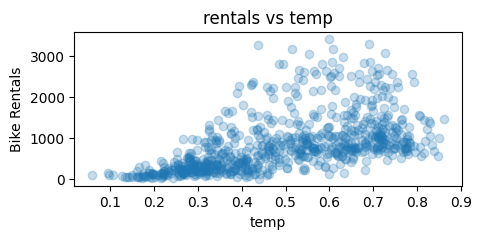

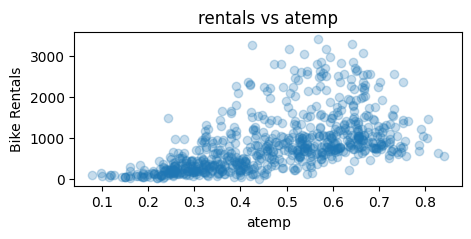

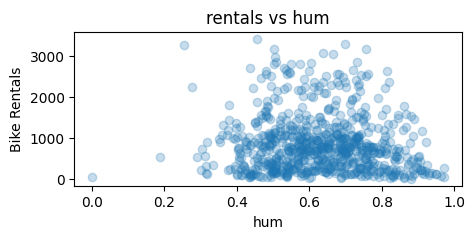

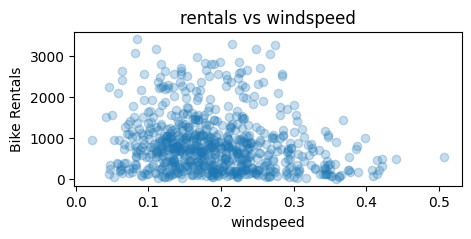

In [9]:
#Hola, hola... Dlaczego na przykład miesiąc to zmienna kategoryczna? Przecież mamy wartości od 1 do 12. Już tłumaczymy, jeśli potraktowalibyśmy tak
#tę zmienną to wprowadzilibyśmy zakłamanie rzeczywistości. Dla modelu wartość 12 jest daleko od wartości 1, zaś w rzeczywistości po grudniu następuje
#styczeń. Innym powodem jest również nieliniowość – w miesiącach będących w środku roku jest średnio więcej rowerzystów niż na początku czy na końcu 
#roku. Trzecim powodem jest, że mamy 12 unikalnych wartości dla zmiennej mnth, zatem nie jest to wiele. W związku z tym lepiej będzie jak uznamy tę 
#zmienną za kategoryczną. Jeśli nie jest to dla Ciebie w pełni jasne, spytaj Mentora!

#Jak w najprostszy sposób zobaczyć, czy wraz ze wzrostem jednej cechy jest również tendencja dla innej cechy? Jednym z pomysłów może być wykres punktowy.
#Przejdźmy w pętli przez zmienne numeryczne i zróbmy wykres rentals od tych właśnie zmiennych.

for numeric_feature in numeric_features:
    fig = plt.figure(figsize=(5, 2))
    plt.scatter(bike_data[numeric_feature], bike_data[target], alpha=0.25)
    plt.xlabel(numeric_feature)
    plt.ylabel('Bike Rentals')
    plt.title(f'rentals vs {numeric_feature}')
    plt.show()

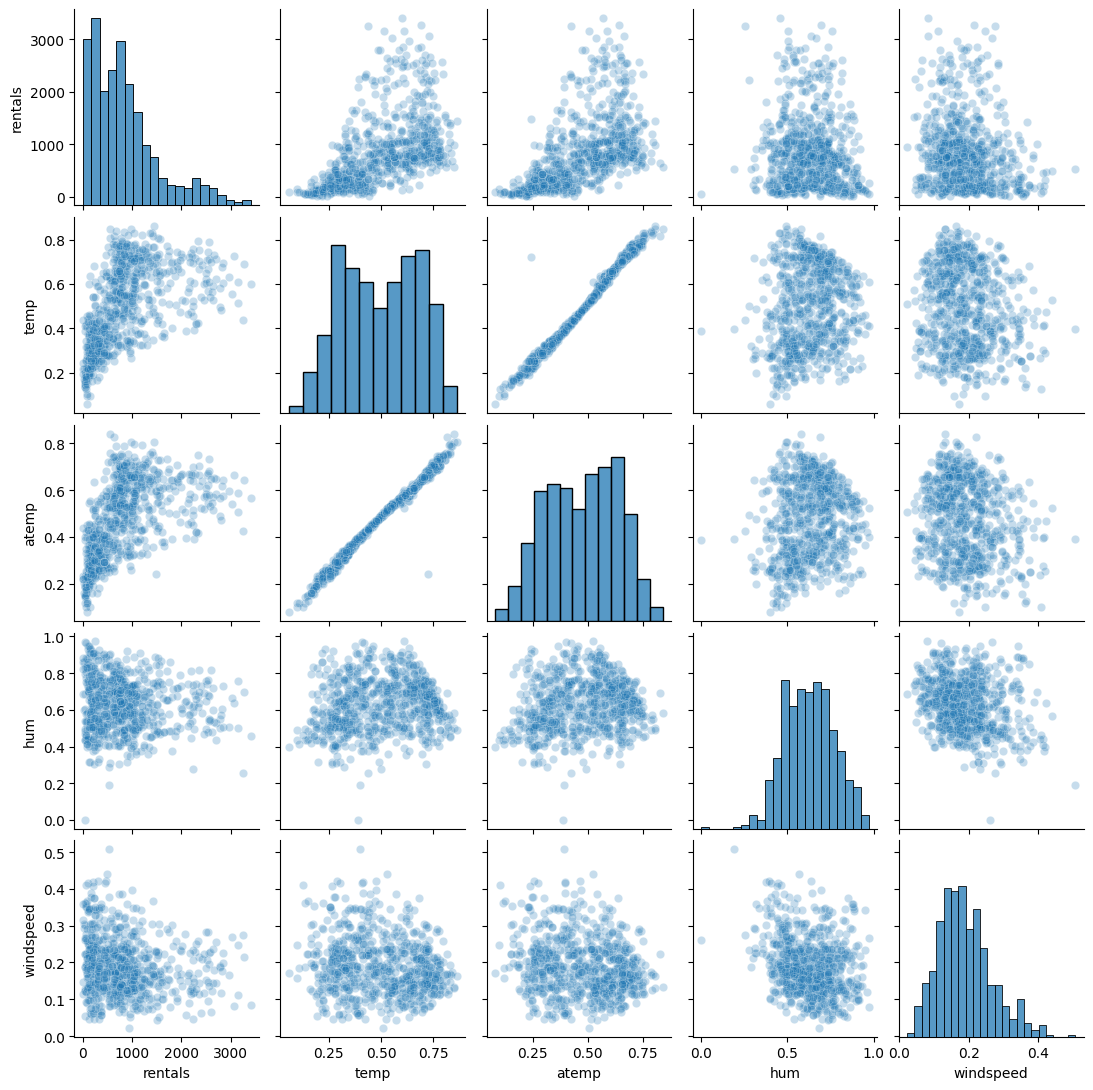

In [10]:
#Dla przypomnienia, zmienne numeryczne są już znormalizowane. Temperatura oraz temperatura odczuwalna niosą tę samą informację. Wydaje się również,
#że to od niej najbardziej jest zależna liczba wypożyczonych rowerów. Im cieplej, tym też więcej rowerzystów. Zależność jest liniowa, jednak od pewnej
#temperatury liczba rowerzystów spada. Świetnie się jeździ rowerem w ciepłe dni, ale już tej przyjemności nie mamy w upały.

#Dla wilgotności czy prędkości wiatru zależność wydaje się odwrotna. Im większe wartości, tym mniej rowerzystów.

#Zależności mogą również występować pomiędzy cechami, zatem wykorzystajmy do tego pairplot z biblioteki seaborn. Wymiennie w tym module stosujemy 
#korelację i zależność. Wspominaliśmy już, że te dwa pojęcia nie są tym samym, jednak w naszym przypadku wiemy, że korelacja pomiędzy temperaturą a 
#liczbą rowerzystów jest również zależnością. Są takie problemy, w przypadku których każdy z nas ma wiedzę. Wyobraź sobie kiedy wolisz jeździć rowerem.
#Jeśli występowałaby korelacja pomiędzy liczbą wypożyczonych rowerów a liczbą obejrzanych przez Ciebie filmów na Netfliksie:

fig = sns.pairplot(bike_data[[target]+numeric_features], kind='scatter', plot_kws={'alpha': 0.25})
fig.fig.set_size_inches(11, 11) #ustawiamy rozmiar wykresu
plt.show()

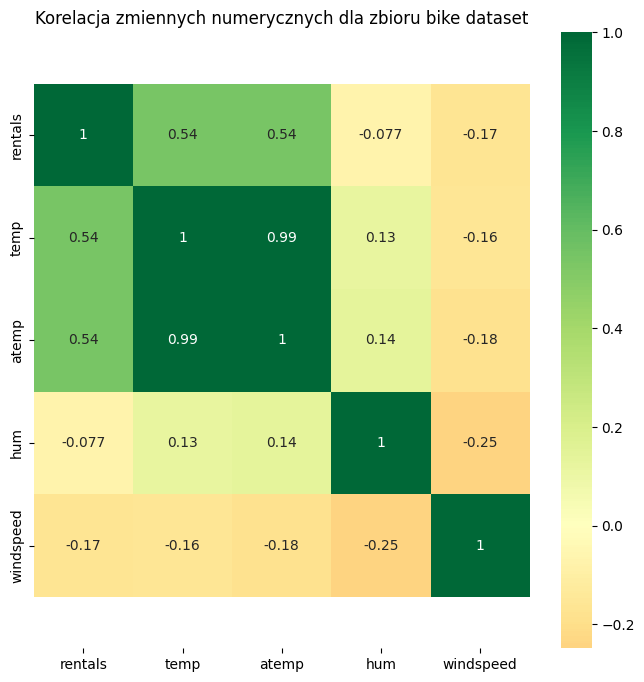

In [11]:
#Dodaliśmy tu również zmienną rentals, a zatem poprzedni scatter plot moglibyśmy zastąpić tym. Pamiętaj, jedną rzecz można wykonać na wiele sposób. 
#Zmienne są względem siebie niezależne poza temperaturą i temperaturą odczuwalną. Te dwie cechy niosą tę samą informację, jedną z nich będziemy mogli 
#później usunąć.

#Wspominaliśmy już o korelacji, nastąpił moment, by tę korelację wyliczyć i porównać z poprzednimi wykresami.

plt.figure(figsize=(8, 8))
ax = sns.heatmap(bike_data[[target]+numeric_features].corr(),
                 xticklabels=bike_data[[target]+numeric_features].corr().columns,
                 yticklabels=bike_data[[target]+numeric_features].corr().columns,
                 cmap='RdYlGn',
                 center=0,
                 annot=True)

plt.title('Korelacja zmiennych numerycznych dla zbioru bike dataset', fontsize=12)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [12]:
#Wnioski te same, które wyciągnęliśmy wcześniej.

#    Liczba rowerzystów jest najbardziej zależna od temperatury.
#    Wilgotność oraz prędkość wiatru mają mniejszy wpływ niż temperatura, korelacja jest ponadto ujemna.
#   Temperatura oraz temperatura odczuwalna niosą tę samą informację.

#Inżynieria cech została już wykonana na podstawie zmiennych związanych z datą. Co zatem możemy zrobić, jeśli mamy dwie zmienne skorelowane ze sobą.
#Z pomocą przychodzi nam PCA (Analiza głównych składowych), lecz ten algorytm poznasz na zajęciach z uczenia nienadzorowanego. 
#Innym pomysłem jest po prostu usunięcie jednej z temperatur. W Data Science czasem wygrywa POMYSŁ i my z tego skorzystamy. 
#Obliczmy różnicę pomiędzy temperaturą odczuwalną a temperaturą i wyskalujmy, korzystając z temperatury zgodnie z poniższym wzorem:
#(atemp - temp)/temp

In [13]:
#Stworzyliśmy nową zmienną difference_temp, możemy zatem usunąć temperaturę odczuwalną i policzyć korelację raz jeszcze, choć teraz jedynie pomiędzy
#naszą zmienną zależną, temperaturą i właśnie stworzoną nową zmienną. Pamiętaj, aby zaktualizować listę ze zmiennymi numerycznymi.

bike_data['difference_temp'] = (bike_data['atemp'] - bike_data['temp'])/bike_data['temp']
bike_data.drop(['atemp'], axis=1, inplace=True)
numeric_features = ['temp', 'difference_temp', 'hum', 'windspeed']
bike_data[['rentals', 'temp', 'difference_temp']].corr()

rentals      temp  difference_temp
rentals          1.000000  0.543285        -0.310423
temp             0.543285  1.000000        -0.599254
difference_temp -0.310423 -0.599254         1.000000

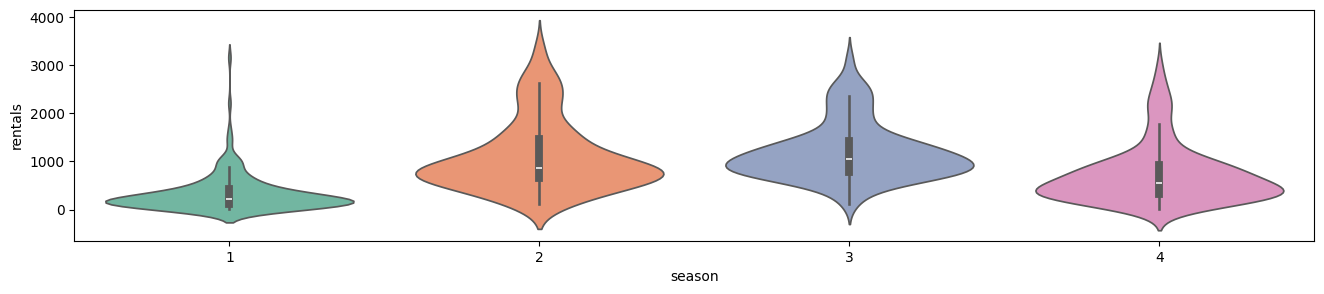

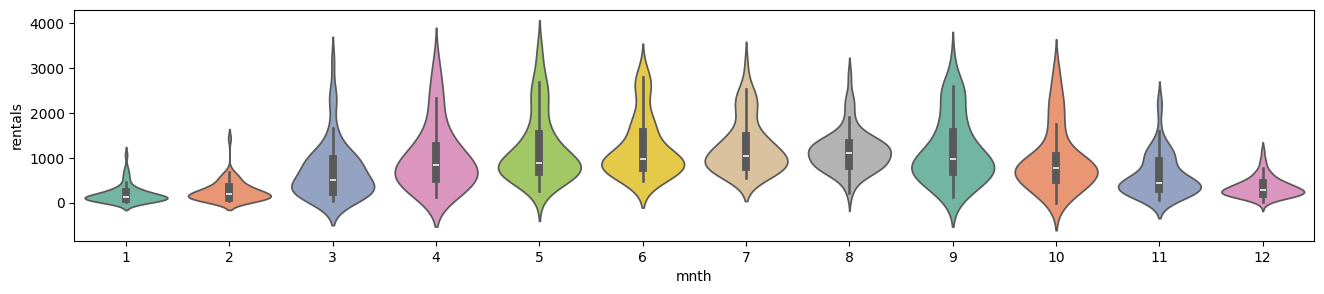

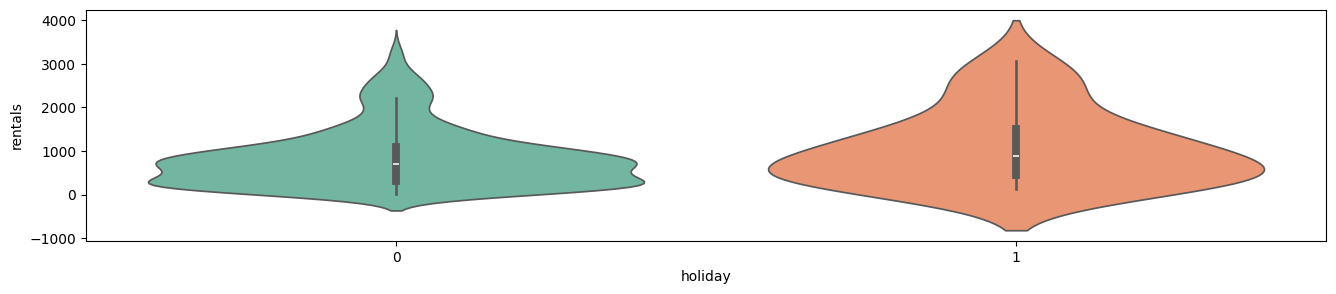

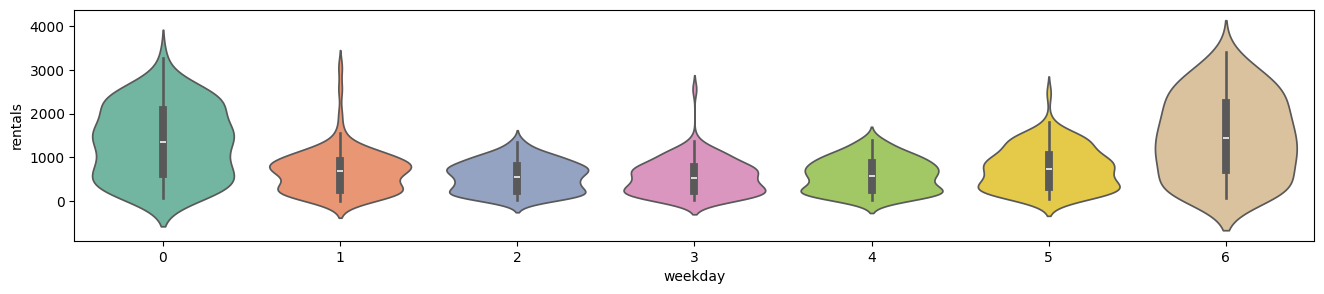

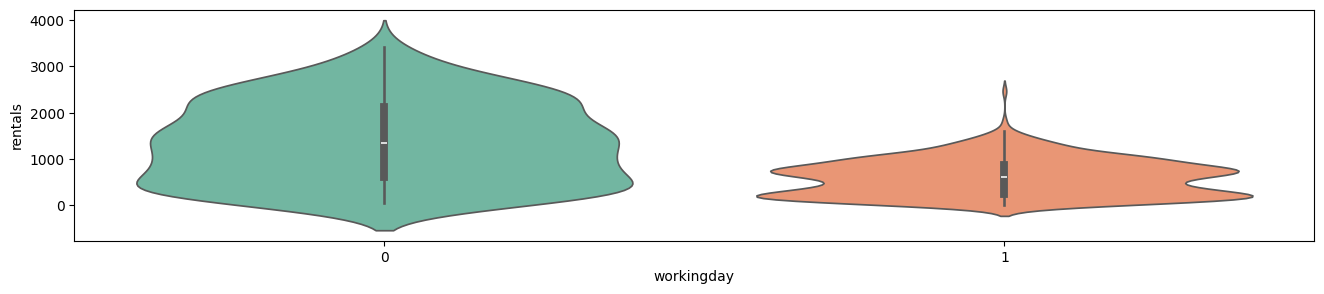

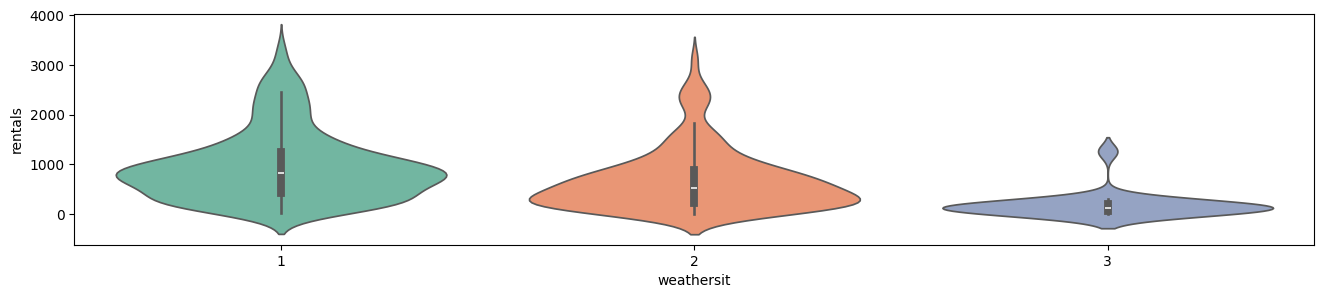

In [14]:
#Nasza nowa zmienna jest skorelowana również z temperaturą, jednak nie tak bardzo oraz niesie informację, która pomoże naszemu modelowi.

#Teraz przejdźmy do zmiennych kategorycznych. Dobrym sposobem jest sprawdzenie średniej w zależności od kategorii, a jeszcze lepszym jest sprawdzenie
#rozkładu zmiennej objaśnianej w zależności od kategorii.

#Dobrym sposobem będzie Box-plot, lecz przejdziemy o krok dalej - stworzymy wykres skrzypcowy, na którym jest więcej informacji. Aby uzyskać podobny 
#wykres moglibyśmy stworzyć Box-plot oraz wizualizować rozkład, wykorzystując histogramy w zależności od kategorii.

for categoric_features in categorical_features:
    plt.figure(figsize=(16, 3))
    sns.violinplot(y=bike_data[target], x=bike_data[categoric_features], hue=bike_data[categoric_features], palette="Set2", legend=False)
    plt.show()

In [15]:
#13.5. Regresja w praktyce cd.
#Regresja liniowa jednej zmiennej

#Poznaliśmy problem do rozwiązania, zweryfikowaliśmy dane oraz udało nam się je przekształcić, choć to w dużej mierze zostało to już wykonane we
#wczytanym przez nas zbiorze. Czym jest regresja liniowa dowiedzieliśmy się już wcześniej, przejdźmy do praktycznej części i stwórzmy taki model. 
#Musimy teraz określić, czym jest X, a czym y. W naszym przypadku - X to zmienna, na podstawie której dokonujemy predykcji, y - zmienna, którą chcemy
#prognozować.

#Spójrzmy raz jeszcze na nasz zbiór danych.

print(f'Numeric features: {numeric_features}')
print(f'Categorical features: {categorical_features}')
print(f'Target: {target}')
display(bike_data)

Numeric features: ['temp', 'difference_temp', 'hum', 'windspeed']
Categorical features: ['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
Target: rentals


season  mnth  holiday  weekday  workingday  weathersit      temp  \
0         1     1        0        6           0           2  0.344167   
1         1     1        0        0           0           2  0.363478   
2         1     1        0        1           1           1  0.196364   
3         1     1        0        2           1           1  0.200000   
4         1     1        0        3           1           1  0.226957   
..      ...   ...      ...      ...         ...         ...       ...   
726       1    12        0        4           1           2  0.254167   
727       1    12        0        5           1           2  0.253333   
728       1    12        0        6           0           2  0.253333   
729       1    12        0        0           0           1  0.255833   
730       1    12        0        1           1           2  0.215833   

          hum  windspeed  rentals  difference_temp  
0    0.805833   0.160446      331         0.056537  
1    0.696087   0.248539      131        -0.026794  
2    0.437273   0.248309      120        -0.035439  
3    0.590435   0.160296      108         0.060610  
4    0.436957   0.186900       82         0.010191  
..        ...        ...      ...              ...  
726  0.652917   0.350133      247        -0.108295  
727  0.590000   0.155471      644         0.006762  
728  0.752917   0.124383      159        -0.043157  
729  0.483333   0.350754      364        -0.094331  
730  0.577500   0.154846      439         0.035463  

[731 rows x 11 columns]

In [16]:
#Jak się przekonaliśmy, liczba wypożyczonych rowerów jest najbardziej zależna od temperatury występującej danego dnia. Stwórzmy model w oparciu o tę
#właśnie zmienną. Naszym X będzie temp, zaś y to oczywiście rentals.

X = bike_data[['temp']].copy()
y = bike_data[target].copy()
print('X:')
print(X.values[:3])
print('\ny:')
print(y.values[:3])

X:
[[0.344167]
 [0.363478]
 [0.196364]]

y:
[331 131 120]


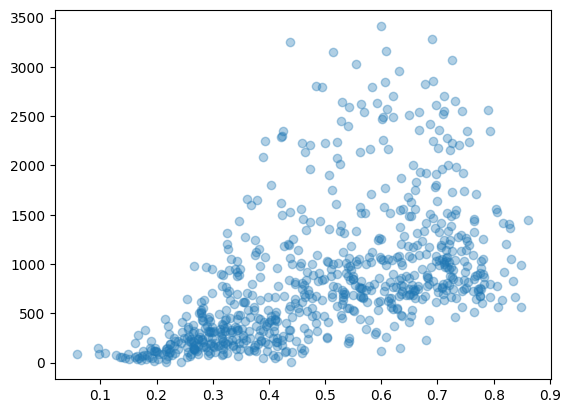

In [17]:
#Wyświetliliśmy trzy pierwsze obserwacje. Raz jeszcze zobaczmy, jak wyglądała historyczna zależność liczby wypożyczonych rowerów od temperatury.

plt.scatter(X, y, alpha=0.35)
plt.show()

In [18]:
#Zbiór treningowy i testowy

#Zanim zaczniemy uczyć model regresji liniowej, dzielimy nasz zbiór na Train (X_train i y_train) oraz Test (X_test i y_test). Chcemy, aby nasz model 
#potrafił generalizować, a zatem poprawnie prognozował wartości, których nie widział. W związku z tym dzielimy nasze dane na treningowe oraz testowe.
#Wielkość obu zbiorów zależy od tego ile mamy wszystkich obserwacji. Im jest ich więcej, tym zbiór testowy może być mniejszy. Najczęściej jest to 67 do
#33 lub 80 do 20. Uczymy model na zbiorze treningowym, następnie sprawdzamy jego jakość na zbiorze testowym. Jeśli jest on reprezentatywny, to podobnych
#wyników spodziewać się możemy w finale. Na koniec możemy wytrenować model dla wybranych hiperparametrów na całym zbiorze. Czym są hiperparametry,
#tego jeszcze się dowiesz.

#Aby podzielić nasz zbiór na dane treningowe oraz testowe skorzystamy z funkcji train_test_split, która dostępna jest w sklearn. Podajemy funkcji X i y.
#Ponadto ustawmy parametr shuffle na False, przez co nie będziemy tasować obserwacji. Zazwyczaj tasujemy, jednak w tym przypadku mamy do czynienia z 
#szeregiem czasowym, gdzie obserwacje są zależne względem siebie. Wartość parametru test_size powinna zawierać się pomiędzy 0.0 a 1.0 i reprezentować
#część zbioru danych przeznaczonego dla zbioru testowego. Jeśli dla tego parametru podasz liczbę całkowitą (int), to oznaczać będzie bezwzględną liczbę 
#obserwacji w zbiorze testowym. Przeznaczmy dla zbioru testowego 20% danych.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False) #shuffle powoduje, że nie ma randomizacji w dzieleniu zbioru
print(f'X.shape: {X.shape}, y.shape {y.shape}')
print()
print(f'X_train.shape: {X_train.shape}, y_train.shape {y_train.shape}')
print(f'X_test.shape: {X_test.shape}, y_test.shape {y_test.shape}')

X.shape: (731, 1), y.shape (731,)

X_train.shape: (584, 1), y_train.shape (584,)
X_test.shape: (147, 1), y_test.shape (147,)


In [19]:
#W zbiorze treningowym mamy 584 obserwacje, a w zbiorze testowym mamy 174 obserwacje.

#Pewnie nie możesz się doczekać nauki pierwszego modelu uczenia maszynowego! Zatem stwórzmy go.

#Najpierw musimy zaimportować model, następnie stworzyć instancję z modelem i nauczyć go.

from sklearn.linear_model import LinearRegression
lr_model = LinearRegression() # inicjalizacja modelu
lr_model.fit(X_train, y_train) # trenowanie modelu

LinearRegression()

In [20]:
#Proste, prawda? Nasz pierwszy model ML. Sprawdźmy wytrenowane parametry modelu:

#    intercept_ ➝ β0,
#    coef_ ➝ β1 oraz kolejne (jeśli zmiennych objaśniających jest więcej).

print(lr_model.intercept_)
print(lr_model.coef_)

-179.96286312537404
[1990.31869846]


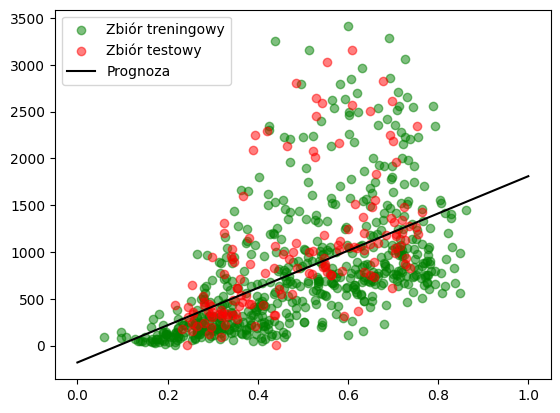

In [21]:
#Wcześniej zastanawialiśmy się, która linia najlepiej odwzorowuje najlepszy model regresji. Sprawdźmy jaka linia została wybrana.

#Jesteś na początku swojej drogi w Data Science. Nie wszystko musisz pamiętać. Wiedz jednak, że dokumentacja takich bibliotek jak Pandas,
#Matplotlib czy Sklearn są bardzo dobre i szczegółowe. Nie wahaj się szukać dodatkowych informacji w internecie, z czasem serwis Stack Overflow 
#stanie się Twoim przyjacielem.

import numpy as np
X_linspace = np.linspace(0, 1, 100)
y_fitted = lr_model.intercept_ + lr_model.coef_ * X_linspace

# Rysowanie wykresu
plt.scatter(X_train, y_train, color='green', alpha=0.5, label='Zbiór treningowy')
plt.scatter(X_test, y_test, color='red', alpha=0.5, label='Zbiór testowy')
plt.plot(X_linspace, y_fitted, color='black', label='Prognoza')
plt.legend(loc='upper left')

plt.show()

In [22]:
#Możesz zauważyć, że dla najmniejszej możliwej wartości temperatury prognoza może być mniejsza niż wartość 0. Oczywiście taka sytuacja nie jest możliwa,
#zatem warto, aby na produkcji wprowadzić warunek, że jeśli prognoza jest mniejsza niż 0, to powinna być równa 0.

#Teraz sprawdźmy, jak wykonać prognozę na nowych danych, ponieważ zawsze to jest naszym celem.

X_new = [[0.3],
         [0.7]]
predicted_data = lr_model.predict(X_new)
print(predicted_data)



#Liczba rowerzystów to liczba całkowita, a zatem powinniśmy naszą prognozę zaokrąglić.

[ 417.13274641 1213.2602258 ]


C:\Users\DarkRaziel\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [23]:
#Ocena modelu

#Mamy już wytrenowany pierwszy model, a zatem teraz możemy go ocenić. Do tego przydadzą nam się predykcje dla zbioru treningowego oraz testowego.

y_predict_train = lr_model.predict(X_train)
y_predict_test = lr_model.predict(X_test)

#Teraz będziemy porównywać prognozę naszego modelu z wartościami prawdziwymi. Wyświetlmy 5 pierwszych prognoz oraz wartości prawdziwych dla zbioru
#testowego.

print('Predykcja:')
print(np.round(y_predict_test[:5]).astype(int))
print('Wartość prawdziwa:')
print(y_test.values[:5])



#Ciężko jednak porównywać wszystkie obserwacje, tym bardziej, że często zbiory danych są o wiele większe. Wykorzystamy metryki, które agregują prognozy
#z wartościami prawdziwymi do jednej liczby.

Predykcja:
[1285 1313 1324 1245 1198]
Wartość prawdziwa:
[1278 1263 1196 1065 2247]


In [24]:
#Współczynnik determinacji

In [25]:
#Gdzie:

#    yi – wartości prawdziwe,
#    ŷi – wartości prognozy,
#    ȳ – średnia z zaobserwowanych obserwacji.

#Dla regresji liniowej współczynnik determinacji to podniesiony do drugiej potęgi współczynnik korelacji. Wartości R2 zbliżone do 1, odpowiadają dobremu
#dopasowaniu modelu, zaś wartości bliskie 0 oznacza niezadowalające dopasowanie. Jak możesz zauważyć we wzorze, w liczniku jest suma kwadratów różnic 
#pomiędzy wartością prawdziwą a prognozą, a w mianowniku pomiędzy wartością prawdziwą a resztą. W związku z powyższym współczynnik determinacji pokazuje
#o ile lepiej nasz model sobie radzi niż średnia. Innymi słowy, pokazuje jaka część y jest wyjaśniana przez model.

#Praktycznie możemy obliczyć R2 dla zbioru testowego, lecz z punktu widzenia Data Science - nie powinniśmy tego robić, ponieważ R2 przekazuje nam 
#informację o ile lepiej nasz model wyjaśnia zmienność niż średnia. Stąd też R2 dla modelu, który jest średnią, daje wynik 0. Ponieważ z założenia nie
#znamy średniej ze zbioru testowego, to również nie powinniśmy dla tego zbioru liczyć R2.

#Sprawdźmy, jaką część zmienności y wyjaśnia nasz model.

from sklearn.metrics import r2_score
print(f'Train R^2: {r2_score(y_train, y_predict_train)}')

Train R^2: 0.30617863454631344


In [26]:
#MAE - Mean Absolute Error

#Jest to średni błąd absolutny.
#Łatwa metryka do zrozumienia, jednak nie karze dużych błędów oraz nie pokazuje, w którą stronę model się myli. Z biznesowej perspektywy niedoszacowanie
#może być droższe niż przeszacowanie. Wyobraźmy sobie, że prognozujesz popyt. Z jednej strony błąd to utracony zysk (wyprodukowaliśmy mniej niż realny 
#popyt), zaś z innej to magazynowanie (sprzedaliśmy mniej niż było na półkach). Który błąd wybierasz?

#Gdy rozwiązujesz problem biznesowy oraz oceniasz model, musisz mieć w pamięci zalety i wady poszczególnych metryk.

#Policzmy MAE na zbiorze treningowym oraz testowym.

from sklearn.metrics import mean_absolute_error
print(f'Train MAE: {mean_absolute_error(y_train, y_predict_train)}')
print(f'Test MAE: {mean_absolute_error(y_test, y_predict_test)}')



Train MAE: 404.8339599752615
Test MAE: 391.02879410802956


In [27]:
#MAPE - Mean Absolute Percentage Error

#Metryka liczy średni błąd procentowy. Różnica w porównaniu do poprzedniej metryki jest taka, że różnicę dzielimy przez wartość prawdziwą.
#Polubisz tą metrykę, biznes lubi gdy rozmawia się o procentach.

from sklearn.metrics import mean_absolute_percentage_error
print(f'Train MAPE: {mean_absolute_percentage_error(y_train, y_predict_train)}')
print(f'Test MAPE: {mean_absolute_percentage_error(y_test, y_predict_test)}')

Train MAPE: 0.9668581511778538
Test MAPE: 2.9864925318560496


In [28]:
#Średnio mylimy się prawie o 300%. Lepiej prognozujemy niż średnia, jednak chyba uznasz, że jeszcze nie jest dobrze.

#MSE - Mean Squared Error

#Średni błąd kwadratowy. Istotne dla tej metryki jest, że błędy podnoszone są do drugiej potęgi. Z tego powodu ta metryka jest wrażliwa na wysokie 
#błędy, a to jest jej przewaga nad MAE. Wadą jest, że wartości nie są dla nas zrozumiałe. Przez to, że błędy podnoszone są do kwadratu, to nie są 
#wyrażane w procentach czy w wartościach wypożyczonych rowerów.

from sklearn.metrics import mean_squared_error
print(f'Train MSE: {mean_squared_error(y_train, y_predict_train)}')
print(f'Test MSE: {mean_squared_error(y_test, y_predict_test)}')

Train MSE: 317745.94124252343
Test MSE: 397066.9447179113


In [29]:
#RMSE – Root Mean Squared Error

#Pierwiastek błędu średniokwadratowego. Dzięki temu, że wyliczamy metrykę z MSE, otrzymujemy nową metrykę, porównywalną do MAE. RMSE nie może być 
#mniejsze niż MAE, a różnica pomiędzy nimi świadczy o skali dużych błędów. Załóżmy, że dla pewnego zbioru błąd absolutny jest ten sam, wtedy też metryka
#RMSE będzie równa MAE.

from math import sqrt
print(f'Train RMSE: {sqrt(mean_squared_error(y_train, y_predict_train))}')
print(f'Test RMSE: {sqrt(mean_squared_error(y_test, y_predict_test))}')

Train RMSE: 563.6895787953894
Test RMSE: 630.1324818781454


In [30]:
#Wizualizacyjna ocena modelu

#Poznaliśmy najczęściej stosowane metryki oceny do problemu regresji. Jak widzisz nie jest to rocket science, metryki są proste do policzenia, jak
#i do zrozumienia. Z pewnością widzisz już różnice pomiędzy nimi, jak i wady oraz zalety.

#Metryki poznane przez Ciebie przed chwilą nadal nie przekazują wszystkich informacji o jakości modelu, na przykład czy model przeszacowuje czy 
#niedoszacowuje. Sprawdźmy na podstawie już wytrenowanego algorytmu użyteczne wizualne metody oceny modelu.
#Porównanie wartości prawdziwej z predykcją

#Robimy wykres punktowy dla prognozy oraz wartości prawdziwej. Wartości x (prognoza) powinna być taka sama co y (wartość prawdziwa).
#Wizualizacja pokazuje ogólny obraz jakości prognozy, dążymy do tego, aby punkty były jak najbliżej oczekiwanej linii trendu.

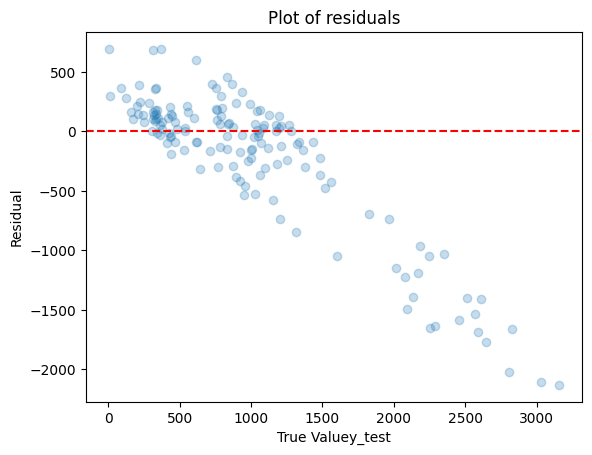

In [31]:
#Wykres reszt

#Jak widzisz na wykresie poprzedzającym, dla wartości prawdziwej model niedoszacowuje wysokich wartości. Z pomocą przychodzi nam wykres reszt.
#Powinien przypominać chmurę, wtedy można uznać, że błędy wynikają z szumu w danych. Jeśli na wykresie reszt można doszukać się zależności to znaczy, 
#że nie w pełni wyjaśniona została zmienność.

errors = y_predict_test - y_test
plt.scatter(x = y_test, y = errors, alpha=0.25)
plt.axhline(0, color="r", linestyle="--")
plt.xlabel('True Valuey_test')
plt.ylabel('Residual')
plt.title(f'Plot of residuals')
plt.show()

In [32]:
#Na powyższym wykresie bardzo zauważalna jest zależność. Im wyższe wartości prawdziwe, tym coraz bardziej model niedoszacowuje

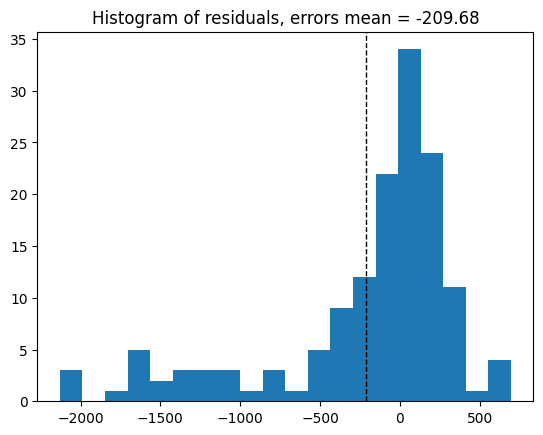

In [33]:
#Histogram reszt

#Pokazuje czy i w jaką stronę model jest obiążony (Bias), tj. czy średnia reszt jest przesunięta względem zera (wtedy przeszacowujemy bądź
#niedoszacowujemy) oraz czy rozkład reszt jest np. skośny (nie w pełni wyjaśniamy wariancję).

plt.hist(errors, bins = 20)
plt.axvline(errors.mean(), color='k', linestyle='dashed', linewidth=1)
plt.title(f'Histogram of residuals, errors mean = {np.round(errors.mean(), 2)}')
plt.show()

C:\Users\DarkRaziel\AppData\Local\Temp\ipykernel_17044\823142416.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_linespace = np.arange(X.min()[0], X.max()[0], step=0.005).reshape(-1, 1)
C:\Users\DarkRaziel\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


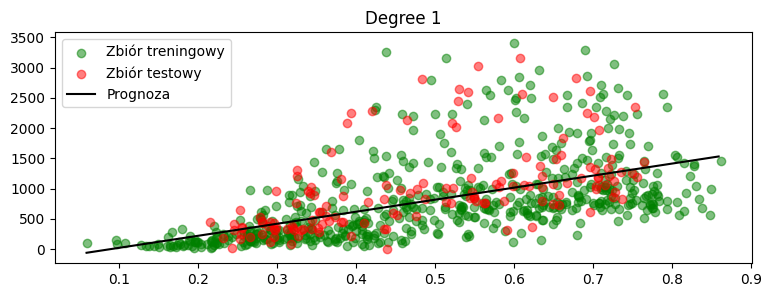

C:\Users\DarkRaziel\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


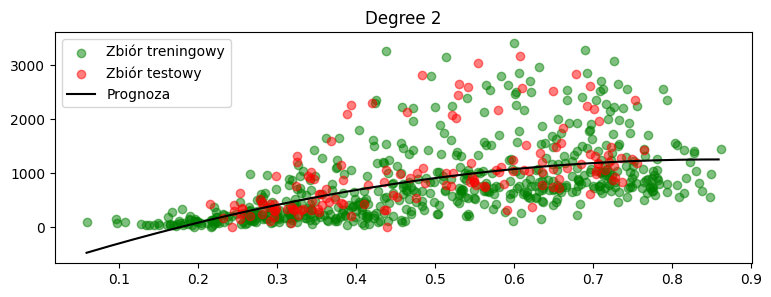

C:\Users\DarkRaziel\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


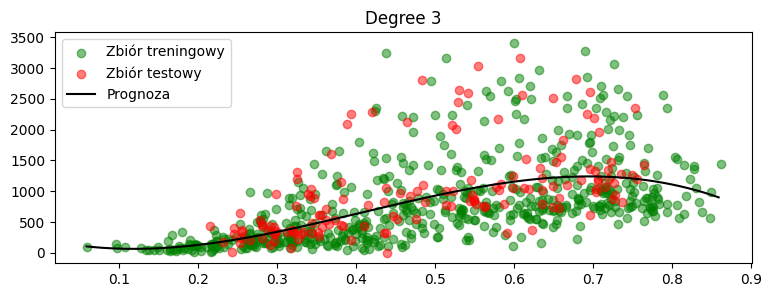

C:\Users\DarkRaziel\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


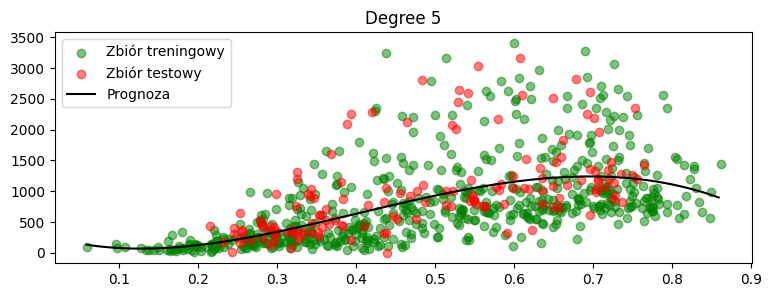

C:\Users\DarkRaziel\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


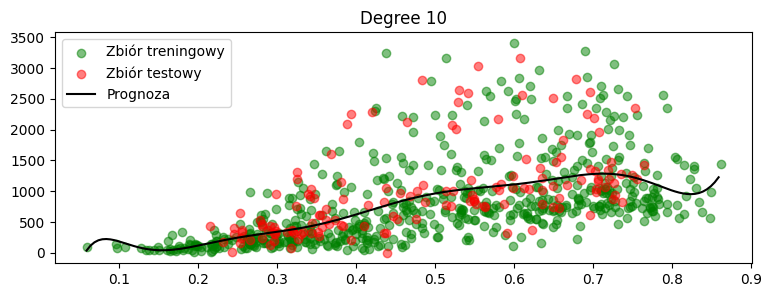

C:\Users\DarkRaziel\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


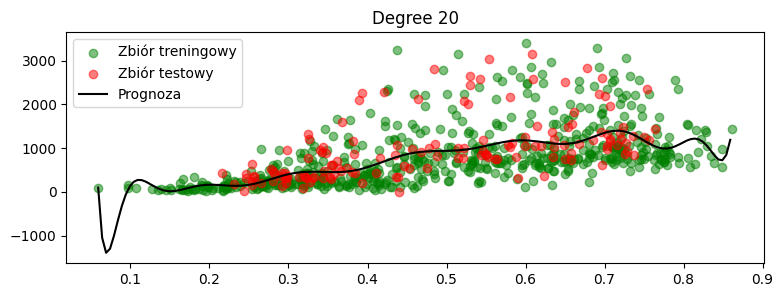

In [34]:
#Regresja wielomianowa

#Nie zawsze jednak zależność jest liniowa. Wraz ze wzrostem temperatury z 15°C na 25°C liczba rowerzystów będzie większa, jednak w przypadku wzrostu z 
#25°C na 35°C zależność może być odwrotna, nie mówiąc o jeszcze wyższych temperaturach. Korzystamy z wielomianu n-tego stopnia, czyli tworzymy nowe 
#cechy, które są potęgą od 1 do n-tego stopnia. Następnie tworzymy regresję liniową wielu zmiennych, które stworzono na podstawie jednej – wielomian to
#nic innego niż inżynieria cech (Feature engineering)!

#Stwórzmy regresję wielomianową w oparciu o temperaturę dla stopnia 1, 2, 3, 5, 10 oraz 20. Skorzystamy z klasy PolynomialFeatures z biblioteki sklearn,
#która generuje nową macierz cech składającą się ze wszystkich kombinacji cech o stopniu mniejszym lub równym podanemu stopniowi. Na ten moment 
#korzystajmy z jednej cechy, ale jeśli nasz zbiór X miałby 2 cechy i jej postać to [a, b] to wielomian drugiego stopnia to cechy [1, a, b, a^2, ab, b^2],
#1 – to wyraz wolny.

#Dla każdego wielomianu wyliczymy R2 oraz RMSE dla zbioru treningowego oraz RMSE dla zbioru testowego.

from sklearn.preprocessing import PolynomialFeatures

# tworzymy puste listy gdzie umieszczane będą metryki oceniające
r_2_train_list = []
rmse_train_list = []
rmse_test_list = []

# Tworzymy X, który zostanie wykorzystany dla wizualizacji naszego modelu
X_linespace = np.arange(X.min()[0], X.max()[0], step=0.005).reshape(-1, 1)
for degree in [1, 2, 3, 5, 10, 20]:

    # Transformacja naszego X
    poly_transformer = PolynomialFeatures(degree=degree)
    X_train_transformed = poly_transformer.fit_transform(X_train)

    # Trenowanie naszego modelu
    polynomial_regression = LinearRegression()
    polynomial_regression.fit(X_train_transformed, y_train)
    plt.figure(figsize=(9, 3))

    # Wizualizacja wartości ze zbioru treningowego oraz testowgo
    plt.scatter(X_train, y_train, color='green', alpha=0.5, label='Zbiór treningowy')
    plt.scatter(X_test, y_test, color='red', alpha=0.5, label='Zbiór testowy')

    ########## Wizualizacja wielomianu ##########
    y_fitted = polynomial_regression.predict(poly_transformer.transform(X_linespace))
    plt.plot(X_linespace, y_fitted, color='black', label='Prognoza')
    plt.title(f'Degree {degree}')
    plt.legend(loc='upper left')
    plt.show()

    # Predykcja modelu na zbiorze treningowym
    prediction_train = polynomial_regression.predict(X_train_transformed)

    # Predykcja modelu na zbiorze testowym - najpierw jednak należy przekształcić zbiór testowy
    X_test_transformed = poly_transformer.transform(X_test)
    prediction_test = polynomial_regression.predict(X_test_transformed)

    # Ocena modeli
    r_2_train_list.append(r2_score(y_train, prediction_train))
    rmse_train_list.append(sqrt(mean_squared_error(y_train, prediction_train)))
    rmse_test_list.append(sqrt(mean_squared_error(y_test, prediction_test)))

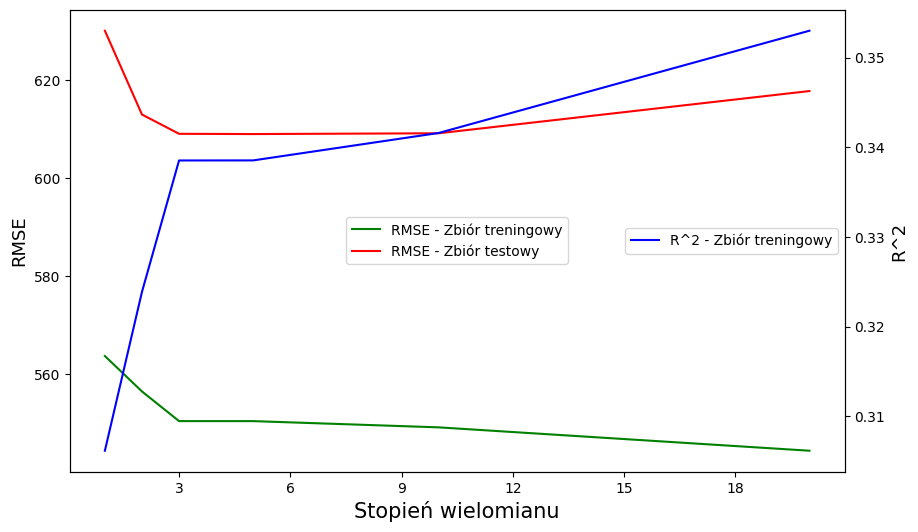

In [35]:
#Trzeci stopień wielomianu wydaje się zgodny z tym, o czym wcześniej mówiliśmy. Patrząc na kolejne wykresy widać, że model uczy się szumu, 
#przeucza się, a tym samym nie potrafi generalizować. Sprawdźmy metryki dla zbioru treningowego oraz testowego w zależności od stopnia wielomianu.

from matplotlib.ticker import MaxNLocator
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot()
ax.plot([1, 2, 3, 5, 10, 20], rmse_train_list, color='green', label='RMSE - Zbiór treningowy')
ax.plot([1, 2, 3, 5, 10, 20], rmse_test_list, color='red', label='RMSE - Zbiór testowy')
ax.legend(loc='center')
ax.xaxis.set_major_locator(MaxNLocator(integer=True)) # Ustawienie typu int dla wartości z osi X
ax.set_ylabel('RMSE', size=13)
ax.set_xlabel('Stopień wielomianu', size=15)

# Dodanie drugiej osi y dla R^2
ax2=ax.twinx()
ax2.plot([1, 2, 3, 5, 10, 20], r_2_train_list, color='blue', label='R^2 - Zbiór treningowy')
ax2.legend(loc='center right')
ax2.set_ylabel('R^2', size=13)

plt.show()

In [36]:
#Wraz ze wzrostem stopnia wielomianu minimalizują się metryki dla zbioru treningowego oraz testowego, jednak do pewnego momentu, od którego wyniki dla
#zbioru testowego są coraz gorsze. Od tego momentu model uczy się szumu ze zbioru treningowego. Spotykamy tutaj pojęcie Bias–variance tradeoff, 
#czyli kompromis pomiędzy obciążeniem a wariancją.

#    Bias – model średnio prognozuje nieprawdziwą wartość.
#    Variance – jeśli dla podobnych wartości cech model prognozuje podobną wartość, to wariancja jest mała. Jeśli natomiast niewielka zmiana cechy
#bardzo wpływa na prognozę, to wariancja jest wysoka.

#Chcemy aby model potrafił generalizować, czyli wytrenowany model na zbiorze treningowym potrafi poprawnie prognozować wartości ze zbioru testowego,
#których wcześniej nie widział. Aby tak było, nie może dojść do niedotrenowania (underfitting) lub przetrenowania (overfitting).

#    Niedotrenowanie – model jest zbyt prosty, nie znajduje zależności i nie zwraca dobrych wyników nawet dla zbioru treningowego.
#    Przetrenowanie – model nauczył się szumu, nie potrafi generalizować, nauczył się wartości dla poszczególnych obserwacji.


In [37]:
#Zbiór walidacyjny – sprawdzian krzyżowy

#Wybierzmy zatem ten stopień wielomianu, dla którego najlepsze wyniki mamy w zbiorze testowym. Tak może się wydawać, jednak to częsty błąd! 
#Jest to wyciek danych, czyli data leakage. Ma miejsce, gdy model ma dostęp do informacji, która w praktyce nie byłaby dostępna. To jest tak, jakbyśmy
#chcieli wybrać stopień wielomianu dla danych, których nie znamy. Nie da się. Stopień wielomianu to hiperparametr modelu, czyli parametr podawany przez
#programistę. Musimy zatem wybrać taki hiperparametr, który da najlepszy wynik dla zbioru testowego, nie znając tego zbioru! Stosujemy do tego zbioru 
#walidację, a dokładniej k-krotną walidację krzyżową.

#Dzielimy nasz zbiór treningowy na k podzbiorów. W każdej iteracji jeden podzbiór jest walidacyjnym, a pozostałe podzbiorem treningowym. 
#Uczymy modele na podzbiorach treningowych i liczymy metryki dla walidacyjnego. Wybieramy hiperparametr, który daje najlepszą średnią z 
#podzbiorów walidacyjnych. Zauważ, każdy podzbiór raz jest walidacyjnym, a w pozostałych przypadkach należy do podzbioru treningowego.

#Do podziału zbioru treningowego na podzbiory walidacyjne wykorzystamy klasę KFold, w której podajemy na ile podzbiorów chcemy podzielić nasz zbiór
#treningowy.

from sklearn.model_selection import KFold
cv = KFold(n_splits=5, shuffle=False)

In [38]:
#Wybór hiperparametrów

#Wybierzemy klasę Grid Search (siatka hiperparametrów). Należy sprawdzić wszystkie kombinacje przekazanych hiperparametrów i wybrać te,
#które dają najlepszy średni wynik ze zbiorów walidacyjnych – wykorzystasz poznaną walidację krzyżową.

#Nasz model musi najpierw przekształcić dane (stopień wielomianu), a następnie na nich wytrenować model, stąd też kolejność działań jest istotna - 
#stworzymy nasz pierwszy Pipeline, który uwzględnia różne operacje. Wkrótce powiemy o tym więcej.

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

# Tworzymy Pipeline - najpierw tworzymy wielomian, następnie uczymy model
polynomial_regression_pipeline = make_pipeline(PolynomialFeatures(),
                                               LinearRegression())

# Nasz model sprawdzi te hiperparametry
params = {'polynomialfeatures__degree': [1, 2, 3, 4, 5]}

# Inicjalizujemy Pipeline
polynomial_regression_gridsearch = GridSearchCV(polynomial_regression_pipeline,
                                                params,
                                                scoring='neg_mean_squared_error', # wybrane będą takie hiperparametry, które dadzą najmniejszą wartość dla tego scoringu
                                                cv=cv)

# Uczymy Grid Search, podajemy X_train - Pipeline za nas zrobi wielomian :)
polynomial_regression_gridsearch.fit(X_train, y_train)
print("\nNajlepsze hiperparametry:", polynomial_regression_gridsearch.best_params_, "\n")

# Przekazujemy najlepszy estymator
polynomial_regression_model = polynomial_regression_gridsearch.best_estimator_
predictions = polynomial_regression_model.predict(X_test)
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, predictions))}')



#Najlepsze wyniki dla zbiorów walidacyjnych uzyskaliśmy dla wielomianu stopnia 3. Porównaj wynik z poprzednim modelem! Tak, zgadza się – poprawiliśmy
#wynik.


Najlepsze hiperparametry: {'polynomialfeatures__degree': 3} 

RMSE: 609.076780249834


In [39]:
#Najlepsze wyniki dla zbiorów walidacyjnych uzyskaliśmy dla wielomianu stopnia 3. Porównaj wynik z poprzednim modelem! Tak, zgadza się – poprawiliśmy
#wynik.

In [40]:
#Regresja wielu zmiennych

#Jednak nie tylko temperatura ma wpływ na liczbę wypożyczonych rowerów. Dodajmy do X wszystkie zmienne numeryczne.

# Podział na zmienne objaśniające i zmienną objaśnianą
X = bike_data[numeric_features].copy()
y = bike_data[target].copy()

# Podział na zbiór treningowy i testowy (taki sam podział co poprzednio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Uczymy model
polynomial_regression_pipeline = make_pipeline(PolynomialFeatures(),
                                               LinearRegression())
params = {'polynomialfeatures__degree': [1, 2, 3, 4, 5]}
polynomial_regression_gridsearch = GridSearchCV(polynomial_regression_pipeline,
                                                params,
                                                scoring='neg_mean_squared_error', # wybrane będą takie hiperparametry które dadzą najmniejszą wartość dla tego scoringu
                                                cv=cv)

polynomial_regression_gridsearch.fit(X_train, y_train)
print("\nNajlepsze hiperparametry:", polynomial_regression_gridsearch.best_params_, "\n")

polynomial_regression_model = polynomial_regression_gridsearch.best_estimator_
predictions = polynomial_regression_model.predict(X_test)
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, predictions))}')


 {'polynomialfeatures__degree': 1} 

RMSE: 618.1519697010564


In [41]:
#Ups… Wyniki na zbiorze testowym są gorsze. Co jest nie tak, przecież daliśmy modelowi więcej zmiennych? Czemu tylko 1 stopień wielomianu?

#Wykorzystując wielomian dla wielu zmiennych tworzymy kolejne, często takie, które nic nie wnoszą oraz napotykamy na problem klątwy wielowymiarowości.
#Powinniśmy zatem zrobić selekcję cech i nie brać wszystkich stworzonych.

In [42]:
#Regularyzacja
#Ridge, Lasso, elasticNet
#Dla dociekliwych

#Osobom zainteresowanym szczegółami, polecamy te linki: porównanie L1 i L2 regularyzacji oraz porównanie L1 i L2 regularyzacji 2.

#Ogólna idea wprowadzenia regularyzacji jest następująca: im więcej stopni swobody, czyli im więcej różnych wag ma dany model, tym prościej ulega on
#zjawisku overfittingu. Każda waga odpowiada jednej cesze (feature) danych wejściowych. Czyli zmniejszając ilość wag o dużych wartościach, zapobiegamy
#zjawisku overfittingu.
#Lasso

#Lasso to regresja liniowa z tzw. regularyzacją L1. Sprawia to, że mniej znaczace cechy mają wewnętrzne wagi zmniejszone do zera, czyli W OGÓLE nie
#wpływają one na decyzyjność modelu ( np. czy ktoś posiada w domu kota, nie ma zazwyczaj większego znaczenia przy ustalaniu pochodzenia danej osoby na 
#bazie powyższych cech).

#Najważniejszy parametr: alpha - określa stopień regularyzacji: im większa, tym bardziej zmniejszane są mniej znaczące cechy. 0.0 - brak regularyzacji, 
#zachowuje się jak LinearRegression.
#Ridge

#Ridge – regresja liniowa z tzw. regularyzacją L2. Powoduje ona, podobnie jak Lasso, iż mniej znaczące cechy ulegają pomniejszeniu, lecz nie do zera,
#ale do wartości bliskiej zeru, czyli cecha ta posiada MINIMUM.

#W tym wypadku cecha, czy ktoś posiada w domu kota, ma minimalny wpływ na predykcję naszego modelu.

#Najważniejszy parametr: alpha – określa stopień regularyzacji, im większa, tym bardziej zmniejszane są mniej znaczące cechy. 0.0 – brak regularyzacji,
#zachowuje się jak LinearRegression.
#ElasticNet

#ElasticNet – łączy regularyzację L1 i L2, czyli jest połączeniem powyższych modeli.

#Najważniejsze parametry:

#    alpha – określa stopień regularyzacji, im większa, tym bardziej zmniejszane są mniej znaczące cechy. 0.0 - brak regularyzacji, zachowuje się jak 
#    LinearRegression.
#    l1_ratio – określa stopień, jak bardzo klasyfikator zachowuje się jak Lasso. Wartość 1.0 -> mamy Lasso, wartość 0.0 -> mamy Ridge.

#Zaletą jest fakt, że za pomocą Lasso możemy wyznaczyć najważniejsze cechy modelu.
#Podstawowe zasady

#    Używamy Ridge, jeśli chcemy zmniejszyć ilość cech modelu.
#    Używamy Lasso albo ElasticNet, jeśli podejrzewamy, że tylko kilka cech jest przydatnych.
#    Preferujemy ElasticNet nad Lasso, gdyż Lasso jest wrażliwe na korelację między cechami oraz na dużą ilość cech.
#    Nie używamy LinearRegression, gdyż jest "do bani" :)

#Skorzystajmy z ElasticNet. Musimy zaimportować go jako inny model, niemniej nadal jest to regresja liniowa z regularyzacją L1 oraz L2. Dodamy kolejne 
#hiperparametry (alpha oraz l1_ratio) do sprawdzenia w naszym Grid Search.

In [43]:
# Importujemy regresję liniową z regularyzacją Lasso i Ridge
from sklearn.linear_model import ElasticNet

# Uczymy model
polynomial_regression_pipeline = make_pipeline(PolynomialFeatures(),
                                               ElasticNet())

params = {'polynomialfeatures__degree': [1, 2, 3, 4, 5],
          'elasticnet__alpha': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0],
          'elasticnet__l1_ratio': np.arange(0, 1.1, 0.1)}

polynomial_regression_gridsearch = GridSearchCV(polynomial_regression_pipeline,
                                                params,
                                                scoring='neg_mean_squared_error', # wybrane będą takie hiperparametry które dadzą najmniejszą wartość dla tego scoringu
                                                cv=cv)

polynomial_regression_gridsearch.fit(X_train, y_train)
print("\nNajlepsze hiperparametry:", polynomial_regression_gridsearch.best_params_, "\n")

polynomial_regression_model = polynomial_regression_gridsearch.best_estimator_
predictions = polynomial_regression_model.predict(X_test)
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, predictions))}')

C:\Users\DarkRaziel\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.181e+07, tolerance: 2.207e+04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\DarkRaziel\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.663e+07, tolerance: 2.268e+04 Linear regression models with null weight for the l1 regularization term are more ef


Najlepsze hiperparametry: {'elasticnet__alpha': 1.0, 'elasticnet__l1_ratio': np.float64(1.0), 'polynomialfeatures__degree': 5} 

RMSE: 584.8854667922697


In [44]:
#Wykorzystanie zmiennych kategorycznych

#Zostały nam jeszcze zmienne kategoryczne. Dla nich nie powinniśmy tworzyć wielomianu tylko ONE HOT ENCODER, dlatego zrobimy w Pipeline rozróżnienie
#dla zmiennych numerycznych i kategorycznych. Ponadto zlogarytmujmy zmienne numeryczne. Jeśli cofniesz się do części o eksploracji danych, to zobaczysz,
#że rozkłady są skośne ????

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler

# Podział na zmienne objaśniające i zmienną objaśnianą
X = bike_data[numeric_features+categorical_features].copy()
y = bike_data[target].copy()

# Podział na zbiór treningowy i testowy (taki sam podział co poprzednio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
numeric_transformer = Pipeline(steps=[
    ('logtransformer', PowerTransformer()),
    ('standardscaler', StandardScaler()),
    ('polynomialfeatures', PolynomialFeatures())])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Tworzenie końcowego Pipeline, który będziemy trenować
final_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('regressor', ElasticNet())])

params = {'preprocessor__num__polynomialfeatures__degree': [1, 2, 3, 4, 5],
          'regressor__alpha': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0],
          'regressor__l1_ratio': np.arange(0, 1.1, 0.1)}

final_polynomial_regression_gridsearch = GridSearchCV(final_pipeline,
                                                      params,
                                                      scoring='neg_mean_squared_error',
                                                      cv=cv)

final_polynomial_regression_gridsearch.fit(X_train, y_train)
print("\nNajlepsze hiperparametry:", final_polynomial_regression_gridsearch.best_params_, "\n")

final_polynomial_regression_model = final_polynomial_regression_gridsearch.best_estimator_
predictions = final_polynomial_regression_model.predict(X_test)
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, predictions))}')

C:\Users\DarkRaziel\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.169e+07, tolerance: 2.207e+04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\DarkRaziel\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.884e+07, tolerance: 2.268e+04 Linear regression models with null weight for the l1 regularization term are more ef


Najlepsze hiperparametry: {'preprocessor__num__polynomialfeatures__degree': 1, 'regressor__alpha': 0.1, 'regressor__l1_ratio': np.float64(0.4)} 

RMSE: 483.93794140501114


In [48]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, PowerTransformer, StandardScaler, PolynomialFeatures
from sklearn.linear_model import ElasticNet, Ridge
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

# Podział na zmienne objaśniające i zmienną objaśnianą
X = bike_data[numeric_features + categorical_features].copy()
y = bike_data[target].copy()

# Podział na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False, random_state=42)

# Pipeline dla zmiennych numerycznych
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler()),  # Normalizacja cech
    ('polynomialfeatures', PolynomialFeatures(include_bias=False))  # Wielomiany bez biasu
])

# Pipeline dla zmiennych kategorycznych
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first'))  # Uniknięcie pułapki pozorności
])

# ColumnTransformer do przetwarzania cech
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Tworzenie modelu ElasticNet
final_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', ElasticNet(max_iter=10000, tol=1e-3))  # Więcej iteracji, mniejsza tolerancja
])

# Definicja siatki hiperparametrów
grid_params = {
    'preprocessor__num__polynomialfeatures__degree': [1, 2, 3, 4, 5],
    'regressor__alpha': [0.001, 0.01, 0.1, 1.0, 10.0],
    'regressor__l1_ratio': np.linspace(0, 1, 5)  # Testowanie różnych proporcji Lasso/Ridge
}

# Ustawienie domyślnej walidacji krzyżowej, jeśli `cv` nie jest wcześniej zdefiniowane
cv = 5 if 'cv' not in globals() else cv

# GridSearchCV
final_grid_search = GridSearchCV(final_pipeline, grid_params, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
final_grid_search.fit(X_train, y_train)

# Najlepsze hiperparametry
print("\nNajlepsze hiperparametry:", final_grid_search.best_params_, "\n")

# Przewidywania na zbiorze testowym
final_model = final_grid_search.best_estimator_
predictions = final_model.predict(X_test)

# Ocena modelu
trainr2 = r2_score(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
mape = mean_absolute_percentage_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))

print(f'''
Train R^2: {trainr2:.4f}
MAE : {mae:.4f}
MAPE : {mape:.4f}
MSE: {mse:.4f}
RMSE: {rmse:.4f}

''')


Najlepsze hiperparametry: {'preprocessor__num__polynomialfeatures__degree': 2, 'regressor__alpha': 0.1, 'regressor__l1_ratio': np.float64(0.5)} 


Train R^2: 0.4788
MAE : 341.9778
MAPE : 1.1936
MSE: 256809.0613
RMSE: 506.7633




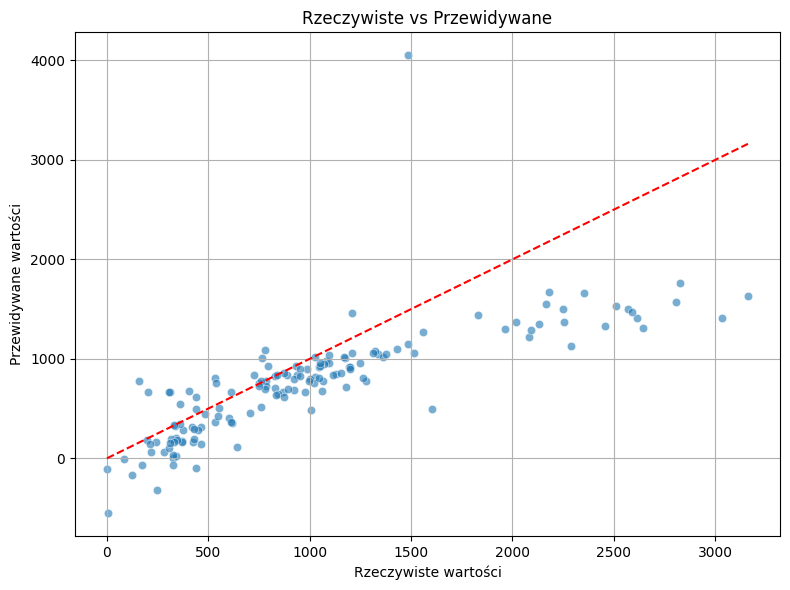

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=predictions, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # linia idealna
plt.xlabel('Rzeczywiste wartości')
plt.ylabel('Przewidywane wartości')
plt.title('Rzeczywiste vs Przewidywane')
plt.grid(True)
plt.tight_layout()
plt.show()

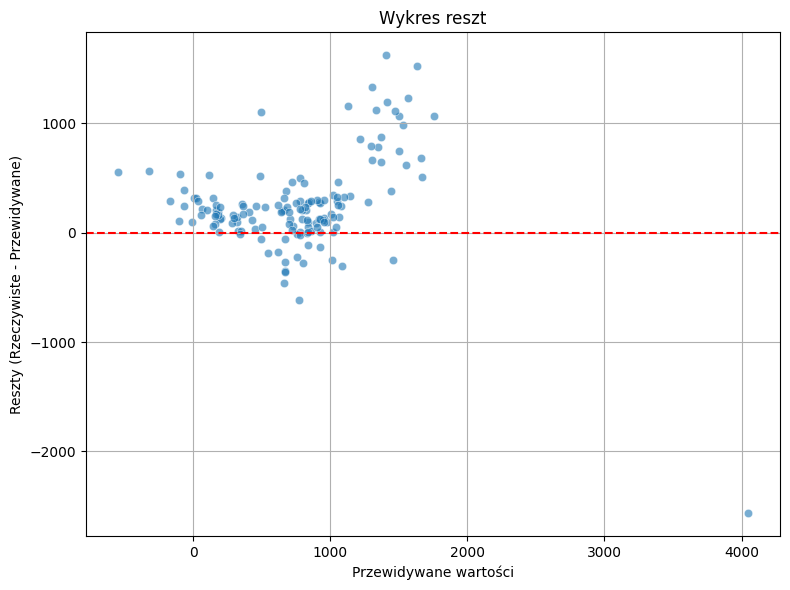

In [50]:
residuals = y_test - predictions

plt.figure(figsize=(8, 6))
sns.scatterplot(x=predictions, y=residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Przewidywane wartości')
plt.ylabel('Reszty (Rzeczywiste - Przewidywane)')
plt.title('Wykres reszt')
plt.grid(True)
plt.tight_layout()
plt.show()

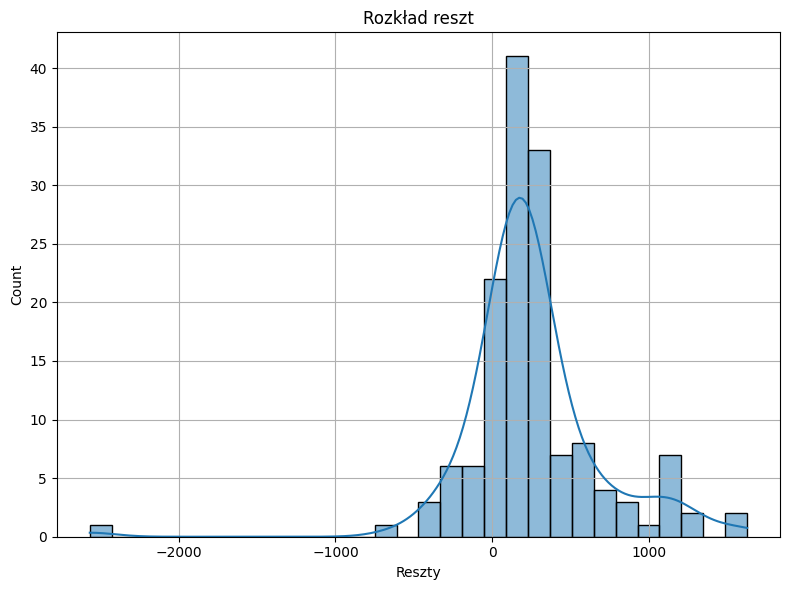

In [51]:
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.xlabel('Reszty')
plt.title('Rozkład reszt')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
#R^2  stary: 0.30617863454631344     nowy: 0.4788
#MAE stary: 391.02879410802956   nowy: 341.9778
#MAPE  stary:  2.9864925318560496  nowy 1.1936
#MSE  stary: 397066.9447179113  nowy 256809.0613
#RMSE  stary 630.1324818781454  nowy: 506.7633
#Jak widać w każdej mierze oceny modelu nowy model nowy model jest znacząco skuteczniejszy w predykcji niż jego pierwsza wersja

#Widać to wrównież na wykresie rewszt gdzie nowym modelu nie ma problemu z niedoszacowywaniem wysokich wartości jak ma to miejsce w jego pierwszej 
#wersji. 